<a href="https://colab.research.google.com/github/poojamahajan0712/Data-Science-Portfolio/blob/main/Computer%20Vision%20/Corn_Disease_Detection/CornDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dataset link - https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset
import tensorflow as tf
print(tf.__version__)
import pathlib
import PIL
import matplotlib.pyplot as plt

2.17.0


In [2]:
dataset_path = "/content/drive/MyDrive/Corn_disease_dataset/data"
data_dir = pathlib.Path(dataset_path)
tot_count = {}
for folder in data_dir.iterdir():
    image_count = len(list(folder.glob('*.[jJ][pP][gG]')))
    tot_count[folder.name] = image_count

tot_count

{'Gray_Leaf_Spot': 574, 'Blight': 1145, 'Common_Rust': 1306, 'Healthy': 1162}

Lets view all types of diseases and healthy class

(1489, 3264)
(256, 256)
(256, 256)
(256, 256)


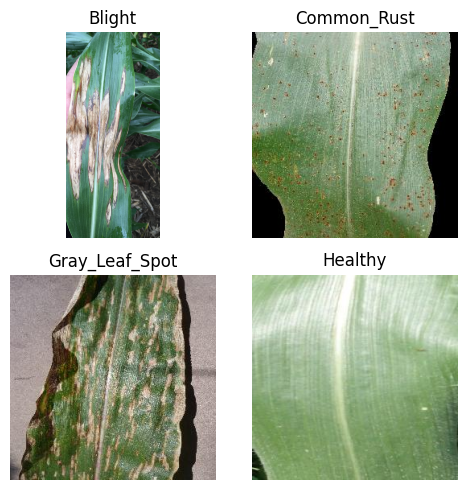

In [3]:
paths_list = {'Blight':"/content/drive/MyDrive/Corn_disease_dataset/data/Blight/Corn_Blight (102).jpg",
              'Common_Rust' :"/content/drive/MyDrive/Corn_disease_dataset/data/Common_Rust/Corn_Common_Rust (1005).JPG",
              'Gray_Leaf_Spot': "/content/drive/MyDrive/Corn_disease_dataset/data/Gray_Leaf_Spot/Corn_Gray_Spot (136).JPG",
              'Healthy' : "/content/drive/MyDrive/Corn_disease_dataset/data/Healthy/Corn_Health (10).jpg"}

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array for easy iteration
# Loop through the dictionary and visualize each image
for ax, (label, image_path) in zip(axes, paths_list.items()):
    image = PIL.Image.open(image_path)
    print(image.size)
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')  # Hide axes for cleaner visualization

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

*  images are of different sizes, need to resize- checked randomly for few images -mostly 256,256 is popular size
* we have jpg,JPG format of data for four folders


In [4]:
## Creating dataset
batch_size = 32
img_height = 256
img_width = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#using the validation_split, subset, and seed parameters, image_dataset_from_directory creates two non-overlapping
#datasets for training and validation, ensuring that the model is trained on one set of images and validated on another, distinct set

Found 4187 files belonging to 4 classes.
Using 3350 files for training.
Found 4187 files belonging to 4 classes.
Using 837 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


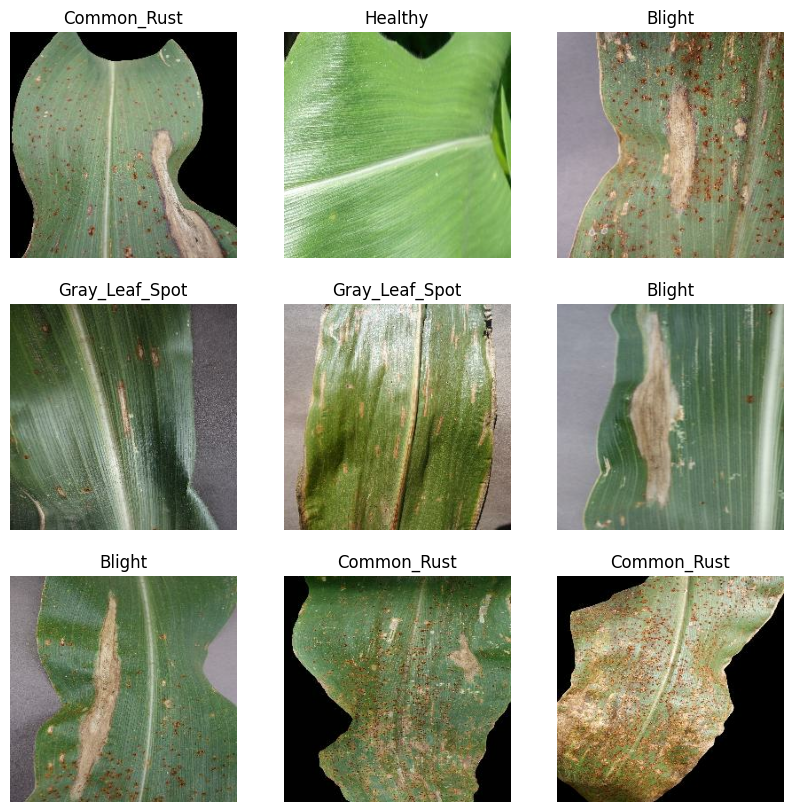

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(image_batch[0,:,:,0])
  print(labels_batch.shape)
  print(labels_batch[0])
  break

(32, 256, 256, 3)
tf.Tensor(
[[154. 151. 149. ... 106. 110. 112.]
 [152. 150. 149. ...  94.  98. 100.]
 [148. 148. 149. ...  86.  89.  90.]
 ...
 [166. 167. 168. ... 149. 147. 143.]
 [168. 168. 169. ... 140. 138. 136.]
 [173. 173. 173. ... 146. 146. 146.]], shape=(256, 256), dtype=float32)
(32,)
tf.Tensor(2, shape=(), dtype=int32)


In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
 43/105 ━━━━━━━━━━━━━━━━━━━━ 3:40 4s/step - accuracy: 0.4533 - loss: 1.3956